# Ford GoBike System Data Analysis

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [441]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import norm

In [590]:
# join all monthly data for year 2018
folder_data = 'info'
list_data = []
for file_name in listdir(folder_data):
    list_data.append(pd.read_csv(folder_data+'/'+file_name))
df = pd.concat(list_data, sort=True)

In [591]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,3940,No,72393,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2018-05-01 18:56:06.3010,NaN,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2018-04-30 22:49:32.6180,Customer
1,3374,No,81034,42.0,37.778650,-122.418230,San Francisco City Hall (Polk St at Grove St),2018-05-01 16:16:39.2470,NaN,NaN,122.0,37.760299,-122.418892,19th St at Mission St,2018-04-30 17:46:04.9970,Customer
2,3191,Yes,86142,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-05-01 16:02:56.7170,1974.0,Male,41.0,37.781270,-122.418740,Golden Gate Ave at Polk St,2018-04-30 16:07:13.9190,Subscriber
3,2970,No,68839,115.0,37.765026,-122.398773,Jackson Playground,2018-05-01 12:19:16.7870,1974.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-04-30 17:11:57.4640,Customer
4,522,No,59091,233.0,37.795812,-122.255555,12th St at 4th Ave,2018-05-01 11:10:13.5410,1965.0,Male,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2018-04-30 18:45:21.5560,Customer


In [592]:
df.shape

(1732358, 16)

In [593]:
# to drop the unwanted coloumn
df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude', \
         'end_station_name','start_station_name','end_time','bike_id'], axis=1, inplace=True)
df.head()

,bike_share_for_all_trip,duration_sec,end_station_id,member_birth_year,member_gender,start_station_id,start_time,user_type
0,No,72393,4.0,NaN,NaN,4.0,2018-04-30 22:49:32.6180,Customer
1,No,81034,42.0,NaN,NaN,122.0,2018-04-30 17:46:04.9970,Customer
2,Yes,86142,67.0,1974.0,Male,41.0,2018-04-30 16:07:13.9190,Subscriber
3,No,68839,115.0,1974.0,Female,284.0,2018-04-30 17:11:57.4640,Customer
4,No,59091,233.0,1965.0,Male,196.0,2018-04-30 18:45:21.5560,Customer


In [594]:
#changing data type of start_time and end_time to datetime.
df['start_time']=pd.to_datetime(df['start_time'])
#df['end_time']=pd.to_datetime(df['end_time'])

In [595]:
df['start_time'].dt.year.unique()

array([2018])

In [596]:
df['start_hour'] = df['start_time'].dt.hour

In [597]:
df['day'] = df['start_time'].dt.strftime('%a')

In [598]:
# create month column by extracting months of start_time 
df['month'] = df['start_time'].dt.strftime('%B')

In [599]:
#change both to category type
#df.month = df.month.astype('category')
#df.day = df.day.astype('category')

cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df.day = pd.Categorical(df.day, categories = cat_order)

In [600]:
category_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                 'September', 'October', 'November', 'December']
df.month = pd.Categorical(df.month, categories = category_order)

#df.month = df.month.cat.set_categories(category_order, ordered=True)

In [601]:
df.drop(['start_time'], axis=1, inplace=True)

In [602]:
df.isnull().sum()

bike_share_for_all_trip         0
duration_sec                    0
end_station_id              11579
member_birth_year          105707
member_gender              105356
start_station_id            11579
user_type                       0
start_hour                      0
day                             0
month                           0
dtype: int64

In [603]:
df.isnull().sum().sum()

234221

In [604]:
# Remove all missing values data

In [605]:
df.dropna(inplace=True)

In [606]:
df.isnull().sum()

bike_share_for_all_trip    0
duration_sec               0
end_station_id             0
member_birth_year          0
member_gender              0
start_station_id           0
user_type                  0
start_hour                 0
day                        0
month                      0
dtype: int64

In [607]:
df.shape

(1615394, 10)

In [608]:
# Create new column for member age
df['age']=(2018-df['member_birth_year']).astype(int)

In [609]:
df.drop(['member_birth_year'], axis=1, inplace=True)

In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615394 entries, 2 to 106717
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   bike_share_for_all_trip  1615394 non-null  object  
 1   duration_sec             1615394 non-null  int64   
 2   end_station_id           1615394 non-null  float64 
 3   member_gender            1615394 non-null  object  
 4   start_station_id         1615394 non-null  float64 
 5   user_type                1615394 non-null  object  
 6   start_hour               1615394 non-null  int64   
 7   day                      1615394 non-null  category
 8   month                    1615394 non-null  category
 9   age                      1615394 non-null  int64   
dtypes: category(2), float64(2), int64(3), object(3)
memory usage: 114.0+ MB


In [611]:
df.duplicated().sum()

2585

In [616]:
df.head()

,bike_share_for_all_trip,duration_sec,end_station_id,member_gender,start_station_id,user_type,start_hour,day,month,age
2,Yes,86142,67.0,Male,41.0,Subscriber,16,Mon,April,44
3,No,68839,115.0,Female,284.0,Customer,17,Mon,April,44
4,No,59091,233.0,Male,196.0,Customer,18,Mon,April,53
5,No,68093,30.0,Female,21.0,Customer,15,Mon,April,57
7,No,55806,193.0,Male,337.0,Customer,17,Mon,April,28


In [617]:
# Age check
df.age.min()

18

In [618]:
df.age.max()

137

Age greater than 80 is unlikely so we filtered out member having age <= 80 

In [619]:
cond = df['age'] <= 80
df.query("@cond", inplace=True)

In [620]:
df.age.max()

80

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613171 entries, 2 to 106717
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   bike_share_for_all_trip  1613171 non-null  object  
 1   duration_sec             1613171 non-null  int64   
 2   end_station_id           1613171 non-null  float64 
 3   member_gender            1613171 non-null  object  
 4   start_station_id         1613171 non-null  float64 
 5   user_type                1613171 non-null  object  
 6   start_hour               1613171 non-null  int64   
 7   day                      1613171 non-null  category
 8   month                    1613171 non-null  category
 9   age                      1613171 non-null  int64   
dtypes: category(2), float64(2), int64(3), object(3)
memory usage: 113.8+ MB


In [624]:
df.describe()

,duration_sec,end_station_id,start_station_id,start_hour,age
count,1.613171e+06,1.613171e+06,1.613171e+06,1.613171e+06,1.613171e+06
mean,7.760144e+02,1.180693e+02,1.195257e+02,1.349192e+01,3.489722e+01
std,1.974168e+03,9.940530e+01,9.935592e+01,4.759491e+00,1.015078e+01
min,6.100000e+01,3.000000e+00,3.000000e+00,0.000000e+00,1.800000e+01
25%,3.450000e+02,3.000000e+01,3.500000e+01,9.000000e+00,2.800000e+01
50%,5.430000e+02,8.800000e+01,8.900000e+01,1.400000e+01,3.300000e+01
75%,8.400000e+02,1.830000e+02,1.860000e+02,1.700000e+01,4.000000e+01
max,8.628100e+04,3.810000e+02,3.810000e+02,2.300000e+01,8.000000e+01


In [625]:
print(df['user_type'].unique())
print(df['member_gender'].unique())
print(df['bike_share_for_all_trip'].unique())

['Subscriber' 'Customer']
['Male' 'Female' 'Other']
['Yes' 'No']


Data visualization is an important skill that is used in many parts of the data analysis process. Exploratory data visualization generally occurs during and after the data wrangling process, and is the main method that you will use to understand the patterns and relationships present in your data. This understanding will help you approach any statistical analyses and will help you build conclusions and findings. This process might also illuminate additional data cleaning tasks to be performed. Explanatory data visualization techniques are used after generating your findings, and are used to help communicate your results to others. Understanding design considerations will make sure that your message is clear and effective. In addition to being a good producer of visualizations, going through this project will also help you be a good consumer of visualizations that are presented to you by others.

The features I think will help support my investigation into feature(s) of interest Trip Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender

In my opinion the following questions are the most important question in the data set.

1) How long does the average trip take.

2) In which decade most ford bike used.

3) Is the trip duration affected by weather( months/seasons).

4) Does the trip duration depend upon if a user is a subscriber or customer.

5) Which gender used most ford bike.


## UNIVARIATE EXPLORATION

### 1. How long does the average trip take?

Text(0.5, 0, 'duration_sec')

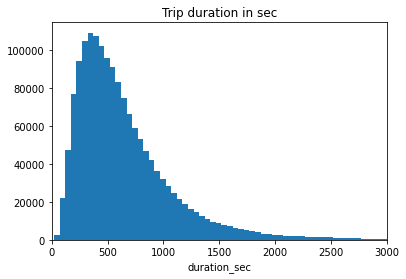

In [627]:
# Let's plot the distribution of trip duration.  
# the trip duration unit in second. 
bins = np.arange(20, df['duration_sec'].max() + 50 , 50)
plt.hist(data = df, x = 'duration_sec' , bins = bins)
plt.xlim(0,3000)
plt.title('Trip duration in sec')
plt.xlabel('duration_sec')

Its really very difficult to vizualize the graph because its right skewed and edges are not easy to observe. In order to proper vizualizatin I convert time duration in second to minute by dividing with 60. In addition to that i also add logarithm transformatio which was explain by the instructor during video lecture. I refer the code below from instructor video lecture

In [628]:
# # Let's plot the distribution of trip duration.  
# change the trip duration unit from second to min 
df['duration_min'] = df['duration_sec'] / 60
df.drop('duration_sec' , axis = 1 , inplace = True)

Text(0.5, 0, 'Duration_minute')

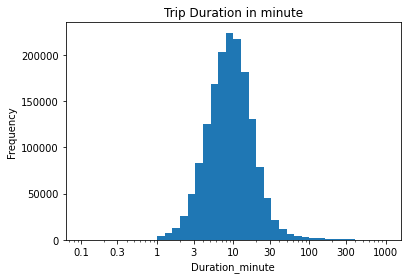

In [629]:
bins = 10**np.arange(-1 , 3.0+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df , x = 'duration_min' , bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.title('Trip Duration in minute')
plt.ylabel('Frequency')
plt.xlabel('Duration_minute')

Trip duration is mostly concentrated on the lower spectrum. Most of the values are less than 2000 seconds with peak around 600 seconds. Trip duration values first increases starting from arount 8000 values at 0 to 12500 values at around 600 but then starts to fall and raching below 2000 values under 2000 sec.

**Majority of population uses the bikes for small time duration which is 10 minute.**

Now lets look at other factors like start and end station id and birth year

(0.0, 390.0)

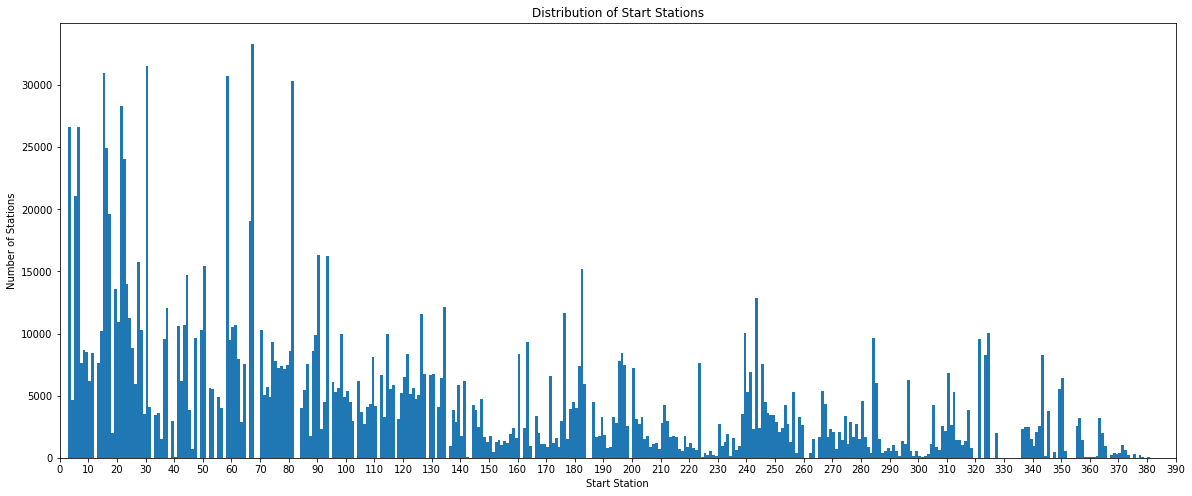

In [630]:
# Plotting start station id distribution.
binsize = 1
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.xlim([0,390])

(0.0, 390.0)

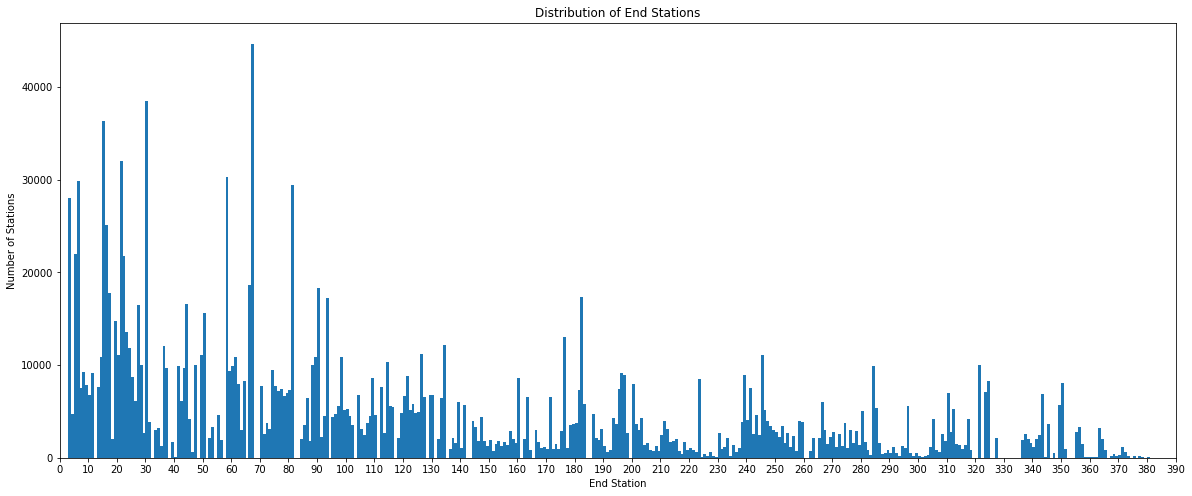

In [631]:
# Plotting end station id distribution.
binsize = 1
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.xlim([0,390])

We can see that same stations are more frequent as start stations and end stations.

###  Which age group uses ford bike most?

Text(0, 0.5, 'Number of Users')

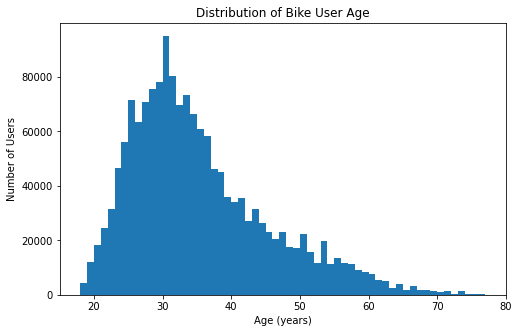

In [632]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['age'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'age', bins = bins)
plt.xlim([15,80])
plt.title('Distribution of Bike User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')

We can see that the distribution is more concentrated between 20 to 40 years old.

### 3) Is the trip duration affected by weather( months/seasons)?

In [633]:
df.tail()

,bike_share_for_all_trip,end_station_id,member_gender,start_station_id,user_type,start_hour,day,month,age,duration_min
106713,No,180.0,Male,182.0,Subscriber,0,Thu,February,25,2.266667
106714,No,336.0,Male,122.0,Subscriber,0,Thu,February,34,5.750000
106715,No,81.0,Female,284.0,Subscriber,0,Thu,February,23,7.316667
106716,No,127.0,Male,113.0,Customer,0,Thu,February,31,8.733333
106717,No,58.0,Male,72.0,Subscriber,0,Thu,February,34,5.316667


In [635]:
df.head()

,bike_share_for_all_trip,end_station_id,member_gender,start_station_id,user_type,start_hour,day,month,age,duration_min
2,Yes,67.0,Male,41.0,Subscriber,16,Mon,April,44,1435.700000
3,No,115.0,Female,284.0,Customer,17,Mon,April,44,1147.316667
4,No,233.0,Male,196.0,Customer,18,Mon,April,53,984.850000
5,No,30.0,Female,21.0,Customer,15,Mon,April,57,1134.883333
7,No,193.0,Male,337.0,Customer,17,Mon,April,28,930.100000


In [636]:
df['month'].value_counts()

October      191322
July         183555
June         181208
August       178204
September    174604
May          167058
November     128405
April        121597
March        102190
February      98349
January       86679
December          0
Name: month, dtype: int64

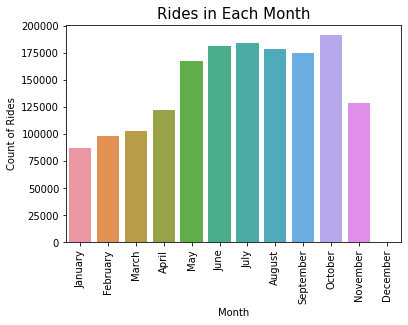

In [637]:
sb.countplot(data = df, x = 'month')
plt.title('Rides in Each Month', fontsize = 15)
plt.xlabel('Month')
plt.ylabel('Count of Rides')
plt.xticks(rotation = 90);

The winter months have the fewest rides. The number of rides continues upwards throughout spring and summer, with the most popular being October. Then, the frequency of rides goes back down again.

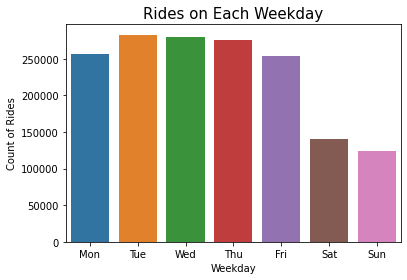

In [640]:
sb.countplot(data = df, x = 'day')
plt.title('Rides on Each Weekday', fontsize = 15)
plt.xlabel('Weekday')
plt.ylabel('Count of Rides');

The rides are most frequent on Tuesday, Wednesday, and Thursday, followed by Monday and Friday. Saturday and Sunday are the least popular days.

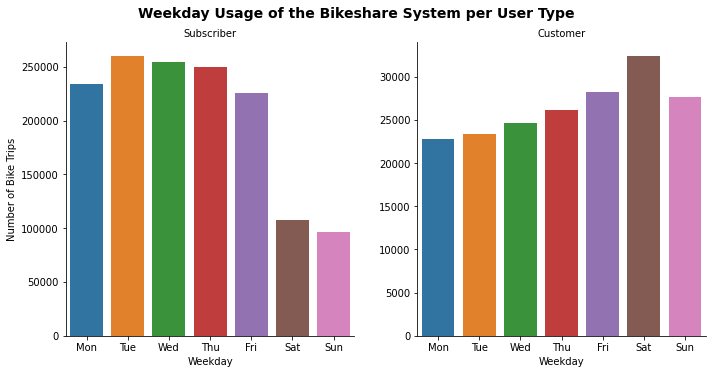

In [641]:
g = sb.catplot(data=df, x='day', col="user_type", kind='count', sharey = False)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System per User Type', y=1.03, fontsize=14, fontweight='semibold');

his analysis is quite illuminating as it shows that subscribers predominately use the ride service on Monday through Friday, while customers ride the most on the weekends. This is most likely due to subscribers using the service to commute to work, while customers use the bikes on an occasional basis for something unusual in their schedule.

Next, let's look at how customers and subscribers use the service on a monthly basis.

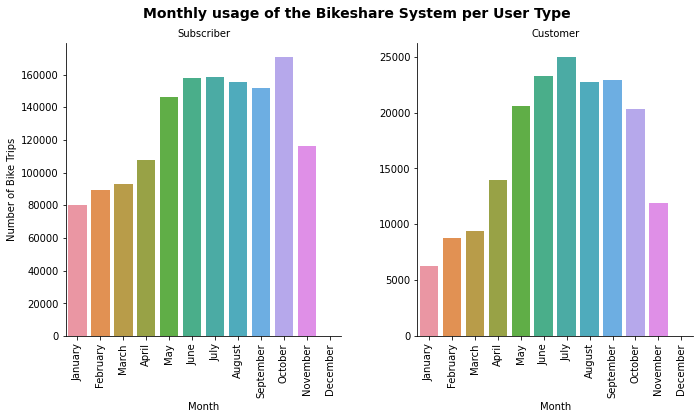

In [642]:
g = sb.catplot(data=df, x='month', col="user_type", kind='count', sharex = True, sharey = False)
g.set_axis_labels("Month", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the Bikeshare System per User Type', y=1.03, fontsize=14, fontweight='semibold')
g.set_xticklabels(rotation=90);

Both customers and subscribers have a similar trend to their monthly usage, where it increases throughout the spring and fall until it drops in November, and for the remainder of the winter. However, the most popular usage month for customers is September, while the most popular month for subscribers is October.

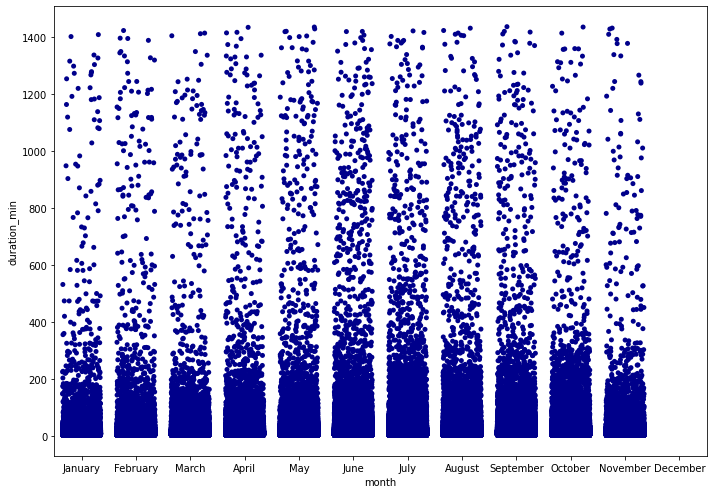

In [394]:
plt.figure(figsize= [11.69, 8.27])
ax = sb.stripplot(x ="month", y = "duration_min", data = df, jitter = 0.35, dodge = True, color = "darkblue")

** From the above graph we conclude that June, July and August are mostly effected by the weather.

In [374]:
# Create 4 season spring, summer, fall and winter.
winter = df.query('month in ["December" , "January" , "February"]' ).duration_min.mean()
spring = df.query('month in ["March" , "April" , "May"]' ).duration_min.mean ()
summer = df.query('month in ["June" , "July" , "August"] ').duration_min.mean()
fall = df.query('month in ["September" , "October" , "November"] ').duration_min.mean()

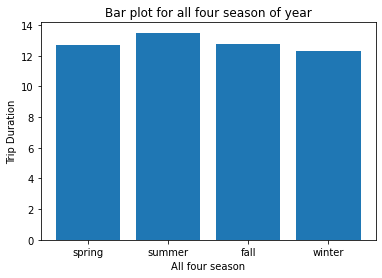

In [376]:
# Create 4 season categories using bar chart for detail analysis.
# Plooting
plt.bar(['spring','summer','fall','winter'],[spring , summer , fall , winter] )
plt.title('Bar plot for all four season of year')
plt.xlabel('All four season')
plt.ylabel('Trip Duration')

*The weather does affect trip duration, but the affect is very limited. Unlike cities like Boston, New York, which have very different four seasons, the weather in SF does not change that much.

1) There is no significant difference of trip duration in terms of four seasons.

It is probably because the weather in San Francisco bay area does not change that much.

2) The most unexpected result is for fall. fall has the lowest trip duration in 2018.

Fall is most likely to experience good weather with pleasant average temperatures in San Francisco.

People are more likely to go out and play outdoor games or do outdoor activities like yoga and exercises.


(array([0]), [Text(0, 0, '0')])

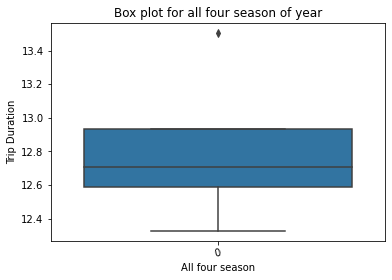

In [643]:
# for the same data i use box plot to better understand the relationship between them.
sb.boxplot(data = [spring , summer , fall , winter]);
plt.title('Box plot for all four season of year')
plt.xlabel('All four season')
plt.ylabel('Trip Duration')
plt.xticks(rotation = 15)

** Summer have the highest trip duration with 14.92. However fall have the lowest trip duration of 13.66

** The weather does affect trip duration, but the affect is very limited. Unlike cities like Boston, New York, which have very different four seasons, the weather in SF does not change that much.

### 4. Does the trip duration depend upon if a user is a subscriber or customer?

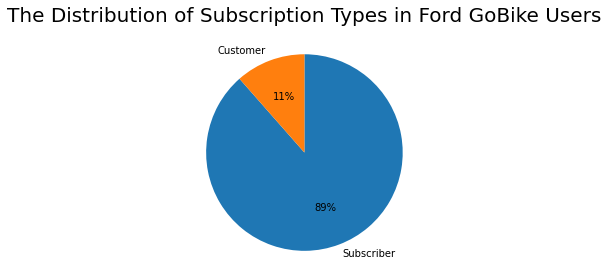

In [379]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("The Distribution of Subscription Types in Ford GoBike Users", fontsize=20, y=1.07)
plt.axis('square');

The majority of the users are subscribers, at 89%.

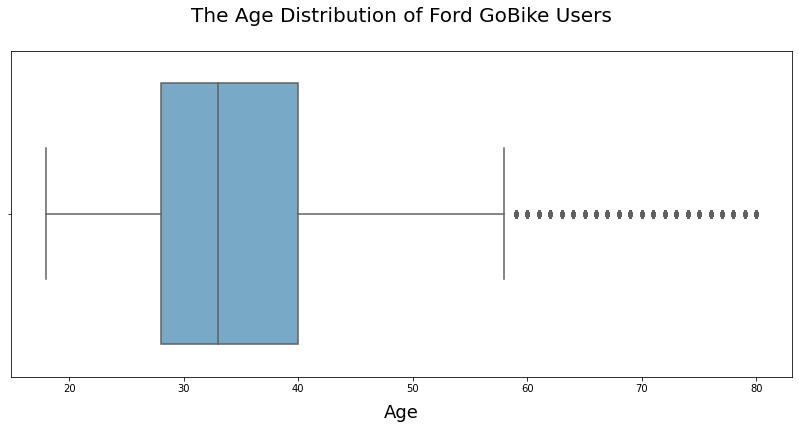

In [380]:
plt.figure(figsize=(14,6))
sb.boxplot(x='age', data=df, palette='Blues')
plt.title("The Age Distribution of Ford GoBike Users", fontsize=20, y=1.07)
plt.xlabel("Age", fontsize=18, labelpad=10);

In [135]:
df.age.mean()

34.98745321574798

In [136]:
df.age.describe()

count    1.615394e+06
mean     3.498745e+01
std      1.044642e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.370000e+02
Name: age, dtype: float64

The mean age is 35.4 years old, and after cleaning the data, the oldest age is 80 years old.

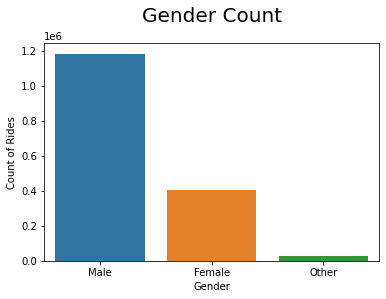

In [381]:
sb.countplot(data = df, x = 'member_gender')
plt.title("Gender Count", fontsize=20, y=1.07)
plt.xlabel('Gender')
plt.ylabel('Count of Rides');

Right away, we can see that the majority of users are male. I made a pie chart to see percentages of the genders.

In [382]:
sorted_counts = df['member_gender'].value_counts()

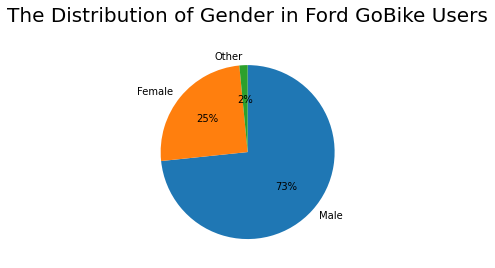

In [383]:
# Plotting pie chart to show the relationship between gender and number of uses of ford bike.
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
#df["member_gender"].value_counts().plot.pie()
plt.title("The Distribution of Gender in Ford GoBike Users", fontsize=20, y=1.07)
#plt.axis('square');
plt.gca().set_aspect("equal")

** Male uses more than twice ford bike as compared to the female While other uses less number of ford bike as compared to male and female.

### 3. Does the trip duration depend upon if a user is a subscriber or customer?

In [ ]:
plt.figure(figsize=[11.69, 8.27])
g = sb.stripplot(x = "month", y="duration_min", hue = 'user_type', data = df, jitter = 0.35, dodge = True,
                  palette = "Dark2")

plt.xlabel('Month')
plt.ylabel('Trip Duration in minute')
plt.title('Trip Duration in minute verses Month and User Type')

/home/ranjeet/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.0, 1450.0)

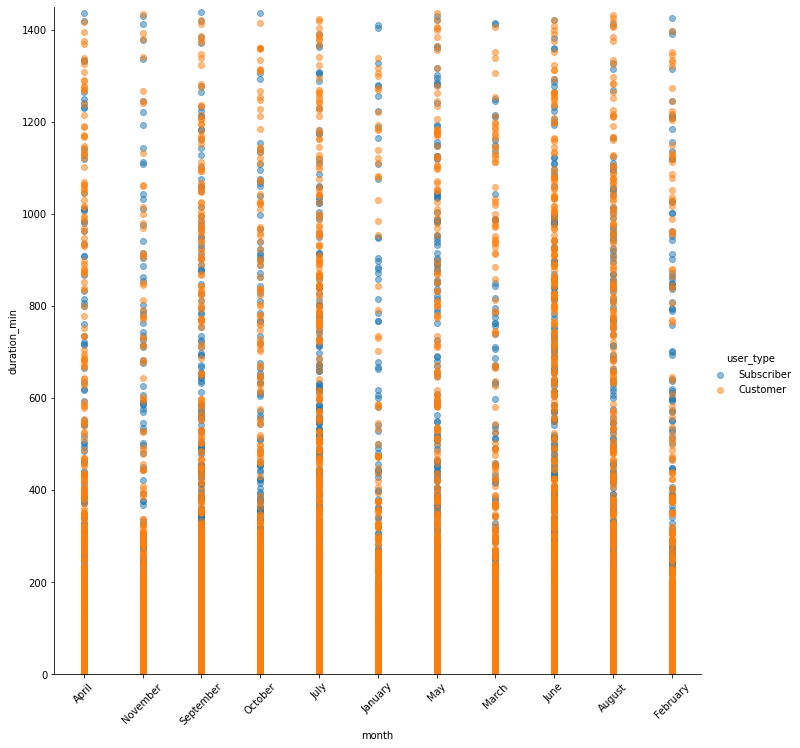

In [648]:
g = sb.FacetGrid(data = df, hue = 'user_type', size = 10)
g.map(plt.scatter, 'month','duration_min', alpha = 0.5)
g.add_legend()
g.set_xticklabels(rotation=45) 
plt.ylim([0,1450])

1) From the above two plot we conclude that there are far more customers than subscribers. The user type does make an impact on trip duration.

2) The most important point about the subscribers is that they rent the bikes for long trips, above 300 minutes.

# Summary of findings :

Since the trip duration has a close relationship with bike share company's revenue, I tried to find out what are the key factors affect trip duration. It turns out that Weather does not have a big effect on the trip duration but user type does have an impact on trip duration. According the analysis, I found subscribers tend to rent the bikes for longer trips ( generally above 300 minutes ). One possible way to increase revenue is to attract more potential customers and convert more exiting customers to subscribers.
